# Searching for chemical composition of Superconductors

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import time
import matplotlib.pyplot as plt

# inline matplotlib
# %matplotlib inline

# if running in jupyter lab
# %matplotlib widget

# if running in jupyter notebook
# %matplotlib notebook

### Superconductor data 

In [2]:
# data = pd.read_csv("SC_nims_data.csv")
data = pd.read_csv("Supercon_data_2.csv")
data.rename(columns={'Tc' : 'Critical Temperature',
                    # 'element' : 'Compound'},
                    'name' : 'Compound'},
           inplace=True)
data

Compound  Critical Temperature
0                       Ba0.4K0.6Fe2As2                 31.20
1             Ca0.4Ba1.25La1.25Cu3O6.98                 40.10
2                          Mo0.39Ru0.61                  6.90
3                            Tm4Os6Sn19                  1.10
4             Nd1Bi0.99Pb0.01S2F0.3O0.7                  4.85
...                                 ...                   ...
16409                             Al4C3                  0.00
16410                      Nb0.96Ta0.04                  8.87
16411  Pb2Sr2Ho0.5Ca0.5Cu2.982Al0.018O8                 63.60
16412              Yb0.5Pr0.5Ba2Cu3O6.9                 34.80
16413                            La5Si3                  1.60

[16414 rows x 2 columns]

#### Grab Chemical Composition

In [3]:
import re
data.loc[:,"Composition"] = data.loc[:,"Compound"].str.findall(r'([A-Z][a-z]*)(\d*[.]*\d*)')
data.head(100)

Compound  Critical Temperature  \
0             Ba0.4K0.6Fe2As2                 31.20   
1   Ca0.4Ba1.25La1.25Cu3O6.98                 40.10   
2                Mo0.39Ru0.61                  6.90   
3                  Tm4Os6Sn19                  1.10   
4   Nd1Bi0.99Pb0.01S2F0.3O0.7                  4.85   
..                        ...                   ...   
95         La0.97Nd0.03Pt1Si1                  3.27   
96             Bi0.055Sn0.945                  3.94   
97                        Pa1                  0.61   
98           Y1Ni1.9Mn0.1B2C1                 12.70   
99          Tl1Sr2Ca1Cu2O6.88                  0.00   

                                          Composition  
0             [(Ba, 0.4), (K, 0.6), (Fe, 2), (As, 2)]  
1   [(Ca, 0.4), (Ba, 1.25), (La, 1.25), (Cu, 3), (...  
2                            [(Mo, 0.39), (Ru, 0.61)]  
3                        [(Tm, 4), (Os, 6), (Sn, 19)]  
4   [(Nd, 1), (Bi, 0.99), (Pb, 0.01), (S, 2), (F, ...  
..                                                ...  
95         [(La, 0.97), (Nd, 0.03), (Pt, 1), (Si, 1)]  
96                         [(Bi, 0.055), (Sn, 0.945)]  
97                                          [(Pa, 1)]  
98     [(Y, 1), (Ni, 1.9), (Mn, 0.1), (B, 2), (C, 1)]  
99    [(Tl, 1), (Sr, 2), (Ca, 1), (Cu, 2), (O, 6.88)]  

[100 rows x 3 columns]

#### Drop compounds with zero Critical Temperature

In [4]:
# indexNames = data[ data['Critical Temperature'] == 0 ].index

# data.drop(indexNames , inplace=True)

# print("remaining data points :", data.shape[0])

#### Set the stoichiometric coefficients

In [5]:
elems = []
from collections import defaultdict 
elem_dict = defaultdict(int)
[[elems.extend([el[0]]) for el in comp] for comp in list(data["Composition"])]

for comp in list(data["Composition"]):
    for el,_ in comp:
        elem_dict[el]+=1
    
elems = list(set(elems))

len(elem_dict)

87

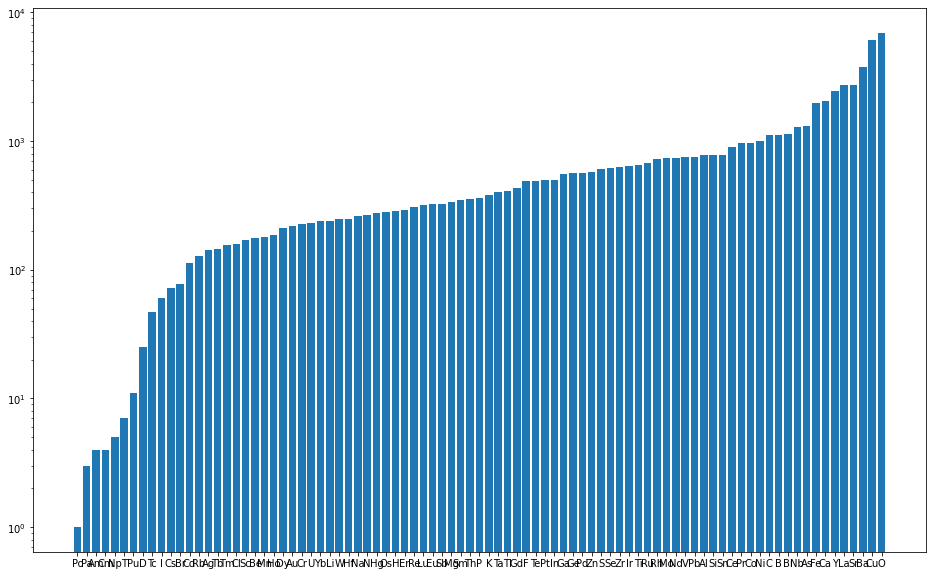

In [6]:
elem_dict = {k:v for k,v in sorted(elem_dict.items(),key=lambda x:x[1])}
plt.figure(figsize=(16,10))
plt.bar(elem_dict.keys(),height=elem_dict.values())
plt.yscale('log')

In [7]:
from element_list import valid_elems

In [8]:
print(len(valid_elems))
for el in elems:
    if el not in valid_elems:
        print(el)

120


In [9]:
comps = []
[comps.extend(l) for l in list(data.loc[:,"Compound"].str.findall(r'\S*OX\S*'))]
print(len(comps))

0


In [10]:
# comps = []
[comps.extend(l) for l in list(data.loc[:,"Compound"].str.findall(r'\S*OY\S*'))]
print(len(comps))

89


In [11]:
# comps = []
[comps.extend(l) for l in list(data.loc[:,"Compound"].str.findall(r'\S*OZ\S*'))]
print(len(comps))

89


In [12]:
# comps = []
[comps.extend(l) for l in list(data.loc[:,"Compound"].str.findall(r'\S*Ox\S*'))]
print(len(comps))

89


In [13]:
# comps = []
[comps.extend(l) for l in list(data.loc[:,"Compound"].str.findall(r'\S*Oy\S*'))]
print(len(comps))

89


In [14]:
# comps = []
[comps.extend(l) for l in list(data.loc[:,"Compound"].str.findall(r'\S*Oz\S*'))]
print(len(comps))

89


In [15]:
[comps.extend(l) for l in list(data.loc[:,"Compound"].str.findall(r'\S*\-\S*'))]
print(len(comps))

90


In [16]:
[comps.extend(l) for l in list(data.loc[:,"Compound"].str.findall(r'\S*\+\S*'))]
print(len(comps))

93


In [17]:
data2 = data[~data["Compound"].isin(comps)].reset_index(drop=True)
data2.head()

Compound  Critical Temperature  \
0            Ba0.4K0.6Fe2As2                 31.20   
1  Ca0.4Ba1.25La1.25Cu3O6.98                 40.10   
2               Mo0.39Ru0.61                  6.90   
3                 Tm4Os6Sn19                  1.10   
4  Nd1Bi0.99Pb0.01S2F0.3O0.7                  4.85   

                                         Composition  
0            [(Ba, 0.4), (K, 0.6), (Fe, 2), (As, 2)]  
1  [(Ca, 0.4), (Ba, 1.25), (La, 1.25), (Cu, 3), (...  
2                           [(Mo, 0.39), (Ru, 0.61)]  
3                       [(Tm, 4), (Os, 6), (Sn, 19)]  
4  [(Nd, 1), (Bi, 0.99), (Pb, 0.01), (S, 2), (F, ...

In [18]:
data2[valid_elems] = 0.0
data2[valid_elems].head()

H    D    T   He   Li   Be    B    C    N    O  ...   Pu   Am   Cm   Bk  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    Cf   Es   Fm   Md   No   Lr  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 120 columns]

In [19]:
for row,symbol_weights in zip(data2.index,data2.Composition):
    for symbol,weight in symbol_weights:
        try:
            data2.at[row,symbol] = (float(weight) if weight else 1.0)
            # if weight=='':
            #     print(symbol,data.at[row,"Compound"],weight)
        except:
            print(row,symbol,weight)
            print(data2.at[row,"Compound"])

In [20]:
# data.fillna(0.0,inplace=True)
data2[elems].head()

Br   Ce   Cu    Y   Se   Pt   Te   Cm   Po    K  ...   Np    U     O   Au  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.6  ...  0.0  0.0  0.00  0.0   
1  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  6.98  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.00  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.00  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.70  0.0   

    Hf   Am   Os   Ho   Sc   Sr  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  6.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 87 columns]

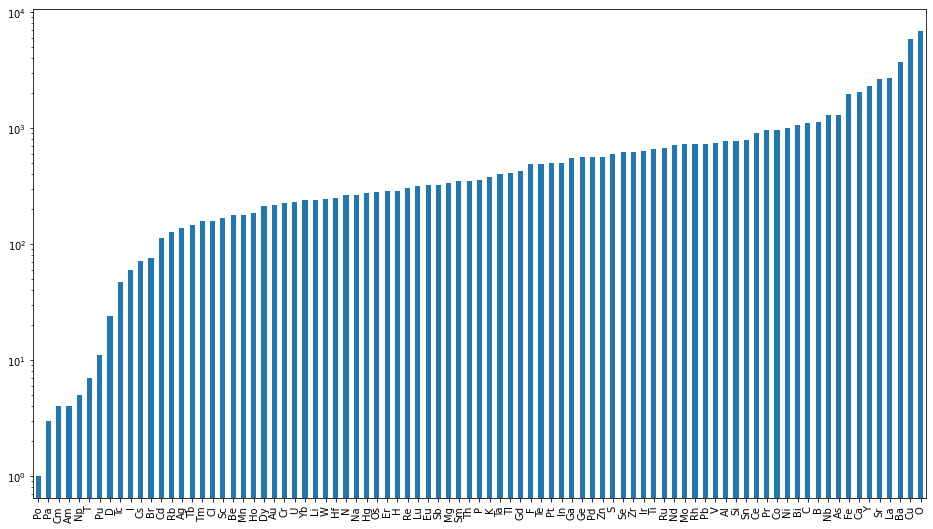

In [21]:
plt.figure(figsize=(16,9))
data2[elems].astype(bool).sum(axis=0).sort_values().plot.bar()
plt.yscale('log')
plt.show()

In [22]:
indexNames = data2[data2.duplicated(subset=elems+["Critical Temperature"],keep="first")].index
data_unq = data2.drop(indexNames).reset_index(drop=True)
print("Initial data points :", data2.shape[0])
print("remaining data points :", data_unq.shape[0])

Initial data points : 16321
remaining data points : 16202


In [23]:
indexNames = data_unq[data_unq.duplicated(subset=elems,keep=False)].index
data_dup = data_unq.loc[indexNames,:].reset_index(drop=True)
data_unq2 = data_unq.drop(indexNames).reset_index(drop=True)
print("duplicate configurations :", data_dup.shape[0])
print("Data uniq :", data_unq2.shape[0])

duplicate configurations : 389
Data uniq : 15813


In [24]:
data_dup["merged_compose"] = data_dup[elems].apply(lambda x:','.join(x.values.astype(str)),axis=1)

In [25]:
for da_du in set(data_dup["merged_compose"]):
    print(data_dup[data_dup["merged_compose"]==da_du][["Critical Temperature","Compound"]])

     Critical Temperature          Compound
334                   1.4  Ce1Rh0.5Co0.5In5
351                   1.6  Ce1Co0.5Rh0.5In5
     Critical Temperature Compound
154              0.000000     Nb1N
242             13.544167    N1Nb1
     Critical Temperature  Compound
34                   3.70  S1Se1Ta1
166                  3.36  Ta1S1Se1
     Critical Temperature      Compound
239                  16.1  Al0.1Si0.9V3
353                  14.0  V3Si0.9Al0.1
     Critical Temperature         Compound
104                  19.6  Al0.95Be0.05Nb3
227                  19.8  Nb3Al0.95Be0.05
    Critical Temperature                   Compound
0                   1.61  Pb0.3325Sn0.6175In0.05Te1
14                  1.60  Sn0.6175Pb0.3325In0.05Te1
     Critical Temperature Compound
55                 0.0241    C8Rb1
155                0.0000    Rb1C8
     Critical Temperature   Compound
195                  2.06  Yb1Pd2Sn1
310                  2.39  Pd2Yb1Sn1
     Critical Temperature         

356                  5.08  Y2C2Br1I1
    Critical Temperature     Compound
33                   0.0  Nb1N0.5C0.5
96                  17.9  Nb1C0.5N0.5
     Critical Temperature Compound
15                 0.1075   Se2Ta1
183                0.1425   Ta1Se2
     Critical Temperature                 Compound
213                  3.00  Ce0.6Nd0.4Bi1S2F0.5O0.5
273                  2.99  Ce0.6Nd0.4F0.5Bi1S2O0.5
     Critical Temperature       Compound
337                 18.00  Nb3Sn0.9Ge0.1
360                 17.97  Nb3Ge0.1Sn0.9
     Critical Temperature Compound
77                    2.0   Ta1Se3
217                   2.1   Se3Ta1
     Critical Temperature   Compound
128                  5.88  Mo6Se6Te2
162                  3.00  Te2Mo6Se6
     Critical Temperature  Compound
140              4.550000  Pd2Y1Sn1
194              4.900000  Pd2Sn1Y1
340              4.993333  Y1Pd2Sn1
     Critical Temperature           Compound
124                  2.80  Sr0.5La0.5F1Bi1S2
306               

289                  13.6  Sr0.8K0.2Fe2As2
     Critical Temperature      Compound
284                   8.6  V3Si0.5Ga0.5
364                  18.2  Ga0.5Si0.5V3
     Critical Temperature           Compound
197                   7.1  Tb0.2Er0.8Ni2B2C1
261                   5.2  Er0.8Tb0.2Ni2B2C1
     Critical Temperature               Compound
5                   0.703  Sn0.57Pb0.38In0.05Te1
142                 0.680  Pb0.38Sn0.57In0.05Te1
     Critical Temperature Compound
17               1.042900    Ta1S2
328              1.933333    S2Ta1
     Critical Temperature     Compound
220                  4.64  Dy1Ir2Rh2B4
301                  4.53  Dy1Rh2Ir2B4
     Critical Temperature     Compound
28                   6.41  Ho1Ir2Rh2B4
274                  6.35  Ho1Rh2Ir2B4
     Critical Temperature Compound
148              6.090000   Zr1B12
346              5.977143   B12Zr1
     Critical Temperature Compound
157              5.470000   Zr2Co1
344              5.352857   Co1Zr2
     C

In [26]:
indexNames = data2[ data2['Critical Temperature'] == 0 ].index
data3 = data2.drop(indexNames).reset_index(drop=True)
print("Initial data points :", data2.shape[0])
print("remaining data points :", data3.shape[0])

Initial data points : 16321
remaining data points : 12369


In [27]:
thres = 94
elem_inate = (data3[elems].sum(axis=0)).index[(data3[elems].astype(bool).sum(axis=0)<thres)]
elem_inate

Index(['Br', 'Cm', 'Po', 'Pu', 'D', 'I', 'Cd', 'Tb', 'Tc', 'Pa', 'Cs', 'T',
       'Np', 'Am'],
      dtype='object')

In [28]:
data3.head()

Compound  Critical Temperature  \
0            Ba0.4K0.6Fe2As2                 31.20   
1  Ca0.4Ba1.25La1.25Cu3O6.98                 40.10   
2               Mo0.39Ru0.61                  6.90   
3                 Tm4Os6Sn19                  1.10   
4  Nd1Bi0.99Pb0.01S2F0.3O0.7                  4.85   

                                         Composition    H    D    T   He   Li  \
0            [(Ba, 0.4), (K, 0.6), (Fe, 2), (As, 2)]  0.0  0.0  0.0  0.0  0.0   
1  [(Ca, 0.4), (Ba, 1.25), (La, 1.25), (Cu, 3), (...  0.0  0.0  0.0  0.0  0.0   
2                           [(Mo, 0.39), (Ru, 0.61)]  0.0  0.0  0.0  0.0  0.0   
3                       [(Tm, 4), (Os, 6), (Sn, 19)]  0.0  0.0  0.0  0.0  0.0   
4  [(Nd, 1), (Bi, 0.99), (Pb, 0.01), (S, 2), (F, ...  0.0  0.0  0.0  0.0  0.0   

    Be    B  ...   Pu   Am   Cm   Bk   Cf   Es   Fm   Md   No   Lr  
0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 123 columns]

In [29]:
indexNames = data3[elems].sum(axis=1).index[((data3[elem_inate]>0).max(axis=1)==True)]
data4 = data3.drop(indexNames).reset_index(drop=True)
print("Initial data points :", data3.shape[0])
print("remaining data points :", data4.shape[0])

Initial data points : 12369
remaining data points : 11979


In [30]:
len(indexNames),len(data3)

(390, 12369)

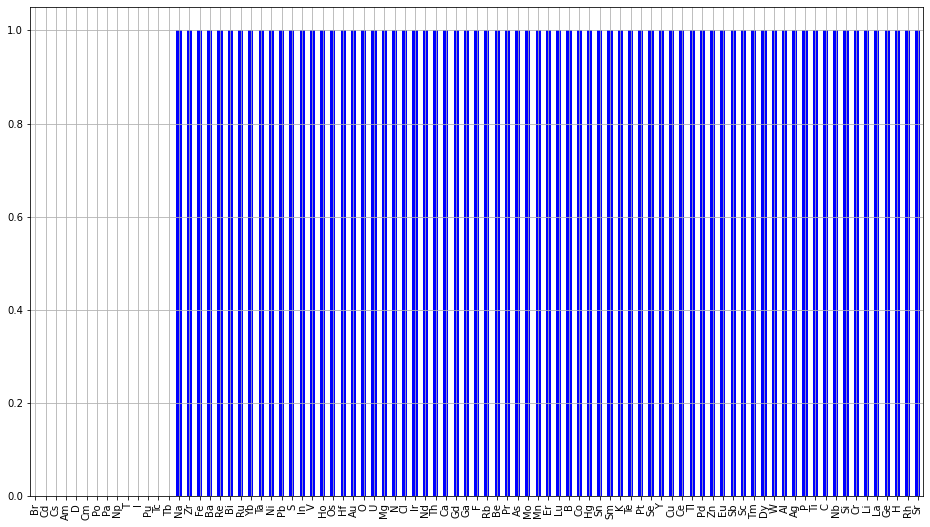

In [31]:
plt.figure(figsize=(16,9))
((data4[elems].astype(bool).sum(axis=0)>=thres)*1-data4[elems].astype(bool).sum(axis=0)*(data4[elems].astype(bool).sum(axis=0)<thres)).sort_values().plot.bar(color='blue')
# plt.yscale('log')
plt.grid()
plt.show()


In [32]:
elems_b = []
elems_x = []
for elem in valid_elems:
    data4[elem+"_b"] = (data4[elem]>0).astype(bool)
    elems_b.append(elem+"_b")
    data4[elem+"_x"] = data4[elem]/np.sum(data4[elems],axis=1)
    elems_x.append(elem+"_x")


In [99]:
data4[elems_b].sum(axis=1).min(),\
data4[elems_x].sum(axis=1).min(),\
data4[elems_b].sum(axis=1).max(),\
data4[elems_x].sum(axis=1).max()

(1, 0.9999999999999997, 8, 1.0000000000000004)

In [45]:
import os
os.makedirs("for_the_app", exist_ok=True)
data4.to_csv("for_the_app/SC_data.csv",index=None)

In [43]:
data4.head()

Compound  Critical Temperature  \
0            Ba0.4K0.6Fe2As2                 31.20   
1  Ca0.4Ba1.25La1.25Cu3O6.98                 40.10   
2               Mo0.39Ru0.61                  6.90   
3                 Tm4Os6Sn19                  1.10   
4  Nd1Bi0.99Pb0.01S2F0.3O0.7                  4.85   

                                         Composition    H    D    T   He   Li  \
0            [(Ba, 0.4), (K, 0.6), (Fe, 2), (As, 2)]  0.0  0.0  0.0  0.0  0.0   
1  [(Ca, 0.4), (Ba, 1.25), (La, 1.25), (Cu, 3), (...  0.0  0.0  0.0  0.0  0.0   
2                           [(Mo, 0.39), (Ru, 0.61)]  0.0  0.0  0.0  0.0  0.0   
3                       [(Tm, 4), (Os, 6), (Sn, 19)]  0.0  0.0  0.0  0.0  0.0   
4  [(Nd, 1), (Bi, 0.99), (Pb, 0.01), (S, 2), (F, ...  0.0  0.0  0.0  0.0  0.0   

    Be    B  ...   Es_b  Es_x   Fm_b  Fm_x   Md_b  Md_x   No_b  No_x   Lr_b  \
0  0.0  0.0  ...  False   0.0  False   0.0  False   0.0  False   0.0  False   
1  0.0  0.0  ...  False   0.0  False   0.0  False   0.0  False   0.0  False   
2  0.0  0.0  ...  False   0.0  False   0.0  False   0.0  False   0.0  False   
3  0.0  0.0  ...  False   0.0  False   0.0  False   0.0  False   0.0  False   
4  0.0  0.0  ...  False   0.0  False   0.0  False   0.0  False   0.0  False   

   Lr_x  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  

[5 rows x 363 columns]

# Machine Learning 
## Critical Temperature from Chemical Composition

In [406]:
data_df = pd.read_csv("for_the_app/SC_data.csv")
data_df.head()

Compound  Critical Temperature  \
0            Ba0.4K0.6Fe2As2                 31.20   
1  Ca0.4Ba1.25La1.25Cu3O6.98                 40.10   
2               Mo0.39Ru0.61                  6.90   
3                 Tm4Os6Sn19                  1.10   
4  Nd1Bi0.99Pb0.01S2F0.3O0.7                  4.85   

                                         Composition    H    D    T   He   Li  \
0  [('Ba', '0.4'), ('K', '0.6'), ('Fe', '2'), ('A...  0.0  0.0  0.0  0.0  0.0   
1  [('Ca', '0.4'), ('Ba', '1.25'), ('La', '1.25')...  0.0  0.0  0.0  0.0  0.0   
2                   [('Mo', '0.39'), ('Ru', '0.61')]  0.0  0.0  0.0  0.0  0.0   
3           [('Tm', '4'), ('Os', '6'), ('Sn', '19')]  0.0  0.0  0.0  0.0  0.0   
4  [('Nd', '1'), ('Bi', '0.99'), ('Pb', '0.01'), ...  0.0  0.0  0.0  0.0  0.0   

    Be    B  ...   Es_b  Es_x   Fm_b  Fm_x   Md_b  Md_x   No_b  No_x   Lr_b  \
0  0.0  0.0  ...  False   0.0  False   0.0  False   0.0  False   0.0  False   
1  0.0  0.0  ...  False   0.0  False   0.0  False   0.0  False   0.0  False   
2  0.0  0.0  ...  False   0.0  False   0.0  False   0.0  False   0.0  False   
3  0.0  0.0  ...  False   0.0  False   0.0  False   0.0  False   0.0  False   
4  0.0  0.0  ...  False   0.0  False   0.0  False   0.0  False   0.0  False   

   Lr_x  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  

[5 rows x 363 columns]

In [181]:
# data = data.sample(frac=1).reset_index(drop=True)

In [50]:
from sklearn import base
class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_names):
        self.col_names = col_names  # We will need these in transform()
    
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        # Return an array with the same number of rows as X and one
        # column for each in self.col_names
        return X[self.col_names]


In [51]:
from sklearn import preprocessing, model_selection, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, brier_score_loss
from sklearn.calibration import CalibratedClassifierCV


In [52]:
from sklearn.decomposition import PCA
from sklearn import base
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.compose import ColumnTransformer


In [53]:
pipe = Pipeline([
                ('cs', ColumnSelectTransformer(valid_elems)),
                ('sc', StandardScaler()),
                ('rfr',RandomForestRegressor())
])

In [188]:
gsc3 = GridSearchCV(pipe, {'rfr__max_depth':[20,30,40,50,60,70],'rfr__min_samples_leaf':[1,2]},verbose=4)
gsc3.fit(data_df[elems],data_df["Critical Temperature"])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] rfr__max_depth=20, rfr__min_samples_leaf=1 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rfr__max_depth=20, rfr__min_samples_leaf=1, score=0.920, total=   6.2s
[CV] rfr__max_depth=20, rfr__min_samples_leaf=1 ......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


[CV]  rfr__max_depth=20, rfr__min_samples_leaf=1, score=0.927, total=   5.9s
[CV] rfr__max_depth=20, rfr__min_samples_leaf=1 ......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.1s remaining:    0.0s


[CV]  rfr__max_depth=20, rfr__min_samples_leaf=1, score=0.933, total=   6.1s
[CV] rfr__max_depth=20, rfr__min_samples_leaf=1 ......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.2s remaining:    0.0s


[CV]  rfr__max_depth=20, rfr__min_samples_leaf=1, score=0.928, total=   6.4s
[CV] rfr__max_depth=20, rfr__min_samples_leaf=1 ......................
[CV]  rfr__max_depth=20, rfr__min_samples_leaf=1, score=0.928, total=   7.1s
[CV] rfr__max_depth=20, rfr__min_samples_leaf=2 ......................
[CV]  rfr__max_depth=20, rfr__min_samples_leaf=2, score=0.911, total=   5.6s
[CV] rfr__max_depth=20, rfr__min_samples_leaf=2 ......................
[CV]  rfr__max_depth=20, rfr__min_samples_leaf=2, score=0.923, total=   5.5s
[CV] rfr__max_depth=20, rfr__min_samples_leaf=2 ......................
[CV]  rfr__max_depth=20, rfr__min_samples_leaf=2, score=0.928, total=   5.7s
[CV] rfr__max_depth=20, rfr__min_samples_leaf=2 ......................
[CV]  rfr__max_depth=20, rfr__min_samples_leaf=2, score=0.926, total=   5.5s
[CV] rfr__max_depth=20, rfr__min_samples_leaf=2 ......................
[CV]  rfr__max_depth=20, rfr__min_samples_leaf=2, score=0.922, total=   5.5s
[CV] rfr__max_depth=30, rfr__min_sa

[CV]  rfr__max_depth=70, rfr__min_samples_leaf=2, score=0.923, total=   7.5s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  7.4min finished


GridSearchCV(estimator=Pipeline(steps=[('cs',
                                        ColumnSelectTransformer(col_names=['Sm',
                                                                           'Si',
                                                                           'Tl',
                                                                           'V',
                                                                           'Au',
                                                                           'Rh',
                                                                           'Gd',
                                                                           'Br',
                                                                           'Np',
                                                                           'Zn',
                                                                           'T',
                                                                 

In [189]:
gsc3.best_params_

{'rfr__max_depth': 50, 'rfr__min_samples_leaf': 1}

In [59]:
train_val = (len(data_df)*80)//100
for md in range(20,90,10):
    pipe = Pipeline([
        ('cs', ColumnSelectTransformer(elems_x)),
        ('sc', StandardScaler()),
        ('rfr',RandomForestRegressor(max_depth=md,min_samples_leaf=1))
    ])
    pipe.fit(data_df.loc[:train_val-1,elems_x],data_df.loc[:train_val-1,"Critical Temperature"])
    
    print("-"*30)
    print("max_depth = ",md)
    print(pipe.score(data_df.loc[:train_val-1,elems_x],data_df.loc[:train_val-1,"Critical Temperature"]))
    print(pipe.score(data_df.loc[train_val:,elems_x],data_df.loc[train_val:,"Critical Temperature"]))

------------------------------
max_depth =  20
0.9771971582238655
0.9228866149214316
------------------------------
max_depth =  30
0.9882126589468493
0.9276928858880233
------------------------------
max_depth =  40
0.9891457699318151
0.9275067545449749
------------------------------
max_depth =  50
0.9894535206969456
0.9292285953370818
------------------------------
max_depth =  60
0.9894312749598706
0.9271347899687457
------------------------------
max_depth =  70
0.9893422073110035
0.9284840066844877
------------------------------
max_depth =  80
0.9893272852161055
0.9269159143420572


------------------------------
max_depth =  10
0.8892920352251081
0.8710417325276376


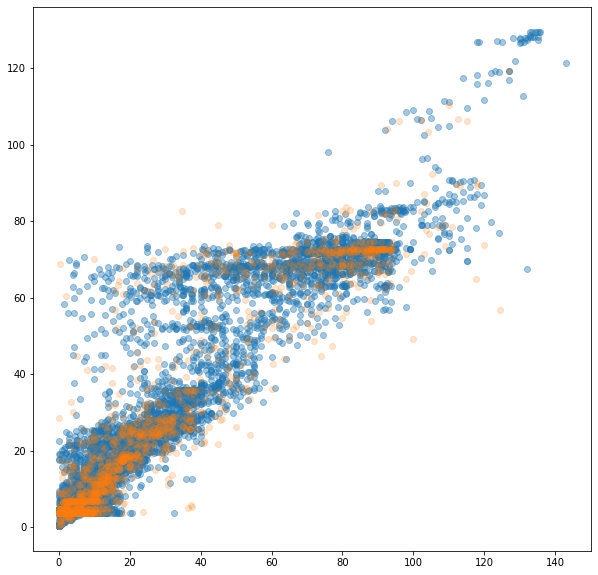

------------------------------
max_depth =  20
0.9767152561450838
0.9214540568080263


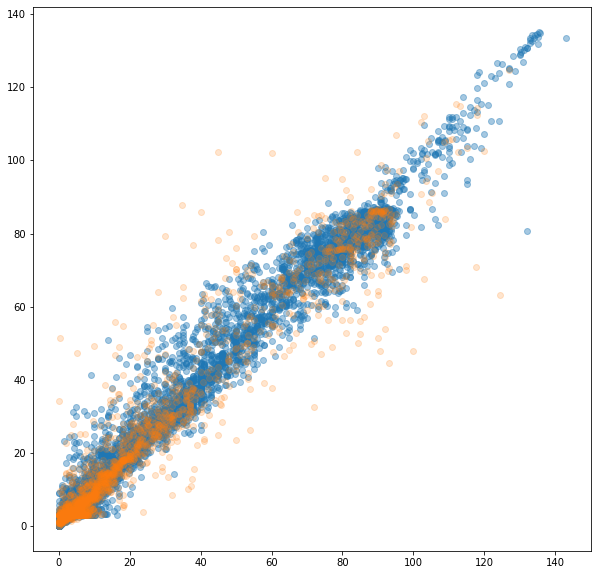

------------------------------
max_depth =  30
0.9878753011457664
0.9266889143587889


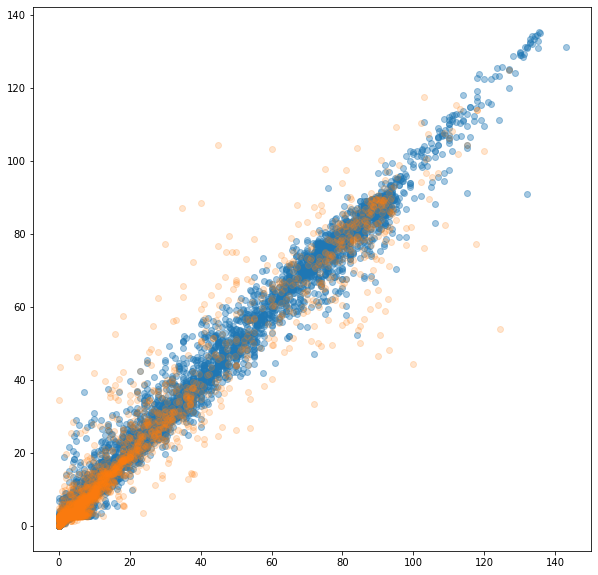

------------------------------
max_depth =  40
0.9891985451223969
0.9278206798836278


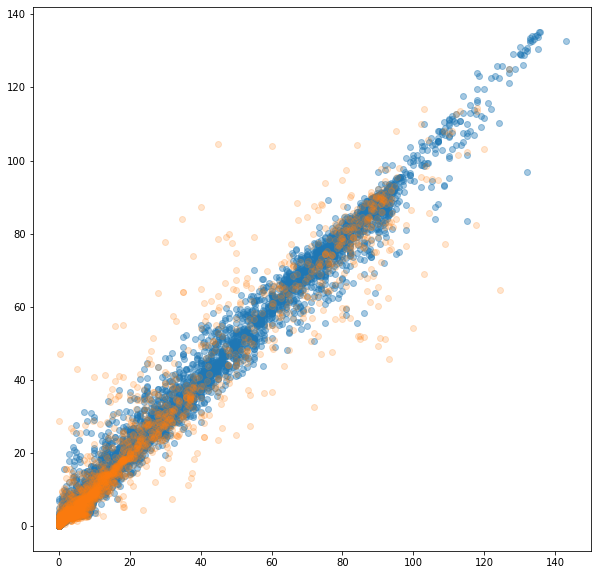

------------------------------
max_depth =  50
0.9895555113393057
0.9290269720312521


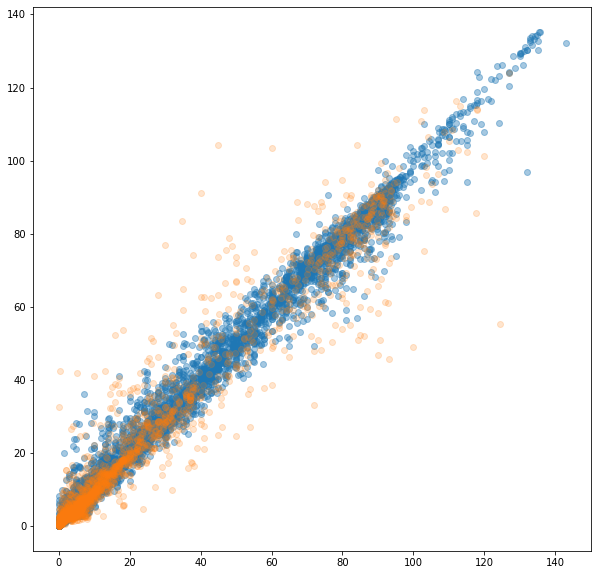

In [57]:
train_val = (len(data_df)*80)//100
md = 20
for md in [10,20,30,40,50]:
    pipe = Pipeline([
        ('cs', ColumnSelectTransformer(elems_x)),
        ('sc', StandardScaler()),
        ('rfr',RandomForestRegressor(max_depth=md,min_samples_leaf=1))
    ])
    pipe.fit(data_df.loc[:train_val-1,elems_x],data_df.loc[:train_val-1,"Critical Temperature"])

    print("-"*30)
    print("max_depth = ",md)
    print(pipe.score(data_df.loc[:train_val-1,elems_x], data_df.loc[:train_val-1,"Critical Temperature"]))
    print(pipe.score(data_df.loc[train_val:,elems_x], data_df.loc[train_val:,"Critical Temperature"]))
    predTc = pipe.predict(data_df.loc[:,elems_x])
    fig,ax = plt.subplots(figsize=(10,10))
    ax.scatter(data_df.loc[:train_val-1,"Critical Temperature"],predTc[:train_val], alpha=0.4)
    ax.scatter(data_df.loc[train_val:,"Critical Temperature"],predTc[train_val:], alpha=0.2)
    # fig.savefig("TC-RFR.png")
    plt.show()

In [ ]:
pipe = Pipeline([
                ('cs', ColumnSelectTransformer(elems_b+["Critical Temperature"])),
            #   ('cor', CorrTransformer(col_names=features,
            #                           stdx_thres=0,
            #                           corx_thres=1,
            #                           cory_thres=0
            #                           )),
            #   ('poly', PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)),
            #   ('var', VarianceThreshold()),
                # ('tfidf', TfidfTransformer()),
                ('rfr',RandomForestRegressor())
])

In [ ]:
gsc = GridSearchCV(pipe, {'rfr__max_depth':[20,30,40],'rfr__min_samples_leaf':[1,2,3]},verbose=4)
gsc.fit(data_df[elems_b+["Critical Temperature"]],data_df[elems_x])

In [491]:
gsc.best_params_

{'rfr__max_depth': 20, 'rfr__min_samples_leaf': 1}

In [62]:
train_val = (len(data_df)*80)//100
for md in range(20,100,10):
    pipe = Pipeline([
        ('cs', ColumnSelectTransformer(elems_b+["Critical Temperature"])),
        ('rfr',RandomForestRegressor(max_depth=md,min_samples_leaf=1))
    ])
    pipe.fit(data_df.loc[:train_val-1,elems_b+["Critical Temperature"]],
             data_df.loc[:train_val-1,elems_x])

    print(f"max_depth = {md}: ", end="", flush=True)
    print(f"Train score = ", end="", flush=True)
    print(pipe.score(data_df.loc[:train_val-1,elems_b+["Critical Temperature"]],
                     data_df.loc[:train_val-1,elems_x]), end="", flush=True)
    print(f", Val score = ", end="", flush=True)
    print(pipe.score(data_df.loc[train_val:,elems_b+["Critical Temperature"]],
                     data_df.loc[train_val:,elems_x]), end="", flush=True)
    print("")
    comp_Tc = pipe.predict(data_df.loc[:,elems_b+["Critical Temperature"]])
    fig,ax = plt.subplots(figsize=(10,10))
    ax.scatter(np.array(data_df.loc[:train_val-1,elems_x]).flatten(),np.array(comp_Tc[:train_val]).flatten(),alpha=0.4)
    ax.scatter(np.array(data_df.loc[train_val:,elems_x]).flatten(),np.array(comp_Tc[train_val:]).flatten(),alpha=0.3)
    fig.savefig(f"Comp-RFR-{md}.png")
    plt.close()


max_depth = 20: Train score = 0.8479601550716784, Val score = 0.8007505681255559
max_depth = 30: Train score = 0.9431749808296025, Val score = 0.8651362679840692
max_depth = 40: Train score = 0.9776389539183992, Val score = 0.8856571297669794
max_depth = 50: Train score = 0.9825341315029671, Val score = 0.8850980989309299
max_depth = 60: Train score = 0.9824251614221685, Val score = 0.8880169862791719
max_depth = 70: Train score = 0.9824223610922816, Val score = 0.8868172902441429
max_depth = 80: Train score = 0.9821810869455948, Val score = 0.8880452913817432
max_depth = 90: Train score = 0.9822289321876843, Val score = 0.8876671332271333


In [63]:
comp_Tc = pipe.predict(data_df.loc[:,elems_b+["Critical Temperature"]])

In [64]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(np.array(data_df.loc[:train_val-1,elems_x]).flatten(),np.array(comp_Tc[:train_val]).flatten(),alpha=0.4)
ax.scatter(np.array(data_df.loc[train_val:,elems_x]).flatten(),np.array(comp_Tc[train_val:]).flatten(),alpha=0.3)
fig.savefig("Comp-RFR.png")
plt.close()
# plt.show()

# Machine Learning 
## Max Critical Temperature from constituent elements
### Chemical composition from constituent elements at max T<sub>c</sub>

In [204]:
unk,cnt = np.unique(list(data_df[elems_b].apply(lambda x:','.join(x.values.astype(str)),axis=1)), return_counts=True)

In [205]:
cnts = np.array(sorted(cnt))
cnt.max(),cnt.min(),

(131, 1)

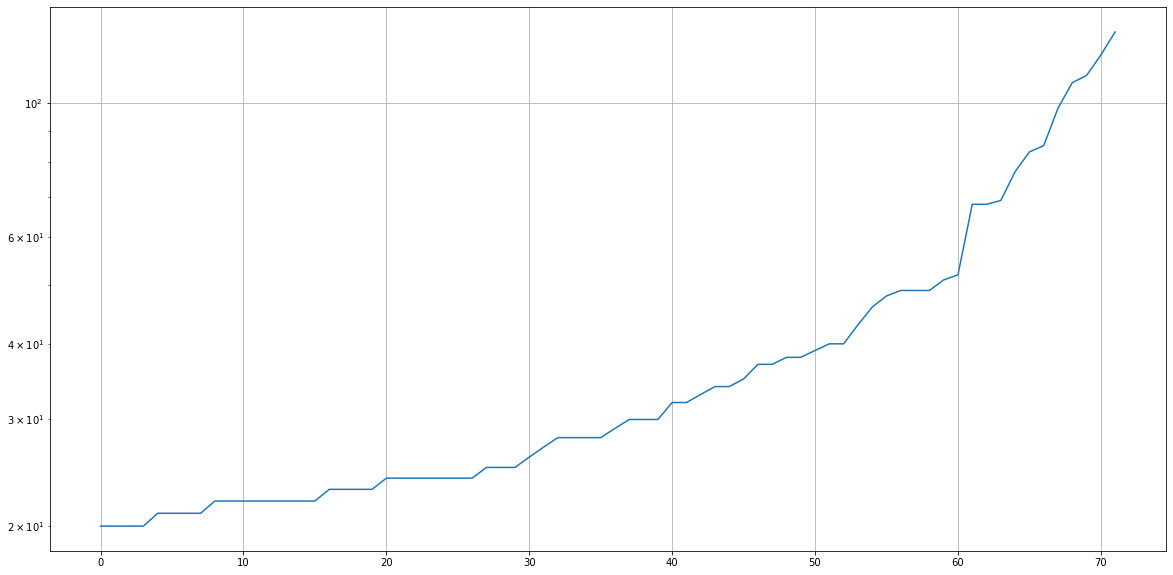

In [215]:
fig = plt.figure(figsize=(20,10))
plt.plot(range(len(cnts[cnts>=20])),cnts[cnts>=20])
# plt.xscale('log')
plt.yscale('log')
plt.grid()
# fig.savefig("unk_cnt.jpg")
# plt.close()
plt.show()

In [100]:
[elem for elem in valid_elems if data_df[elem].sum(axis=0)==0]

['D',
 'T',
 'He',
 'Ne',
 'Ar',
 'Br',
 'Kr',
 'Tc',
 'Cd',
 'I',
 'Xe',
 'Cs',
 'Po',
 'At',
 'Rn',
 'Fr',
 'Ra',
 'Rf',
 'Db',
 'Sg',
 'Bh',
 'Hs',
 'Mt',
 'Ds',
 'Rg',
 'Cn',
 'Nh',
 'Fl',
 'Mc',
 'Lv',
 'Ts',
 'Og',
 'Pm',
 'Tb',
 'Ac',
 'Pa',
 'Np',
 'Pu',
 'Am',
 'Cm',
 'Bk',
 'Cf',
 'Es',
 'Fm',
 'Md',
 'No',
 'Lr']

In [66]:
data_maxTc = data_df.sort_values(by=["Critical Temperature"]).copy()
indexNames = data_maxTc[data_maxTc.duplicated(subset=elems_b,keep="last")].index
data_maxTc = data_maxTc.drop(indexNames)
data_maxTc = data_maxTc.sample(frac=1).reset_index(drop=True)
print("Initial data points :", data_df.shape[0])
print("remaining data points :", data_maxTc.shape[0])

Initial data points : 11979
remaining data points : 2900


In [217]:
pipe = pipe = Pipeline([
                ('rfr',RandomForestRegressor())
])
gsc = GridSearchCV(pipe, {'rfr__max_depth':[60,70,80,90], 'rfr__min_samples_leaf':[1,2]}, verbose=1)
gsc.fit(data_maxTc.loc[:,elems_b+["Critical Temperature"]],data_maxTc.loc[:,elems_x])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.1min finished


GridSearchCV(estimator=Pipeline(steps=[('rfr', RandomForestRegressor())]),
             param_grid={'rfr__max_depth': [60, 70, 80, 90],
                         'rfr__min_samples_leaf': [1, 2]},
             verbose=1)

In [218]:
gsc.best_params_,gsc.best_score_

({'rfr__max_depth': 80, 'rfr__min_samples_leaf': 1}, 0.7428682867155266)

0.9656388007594043
0.650146544508394


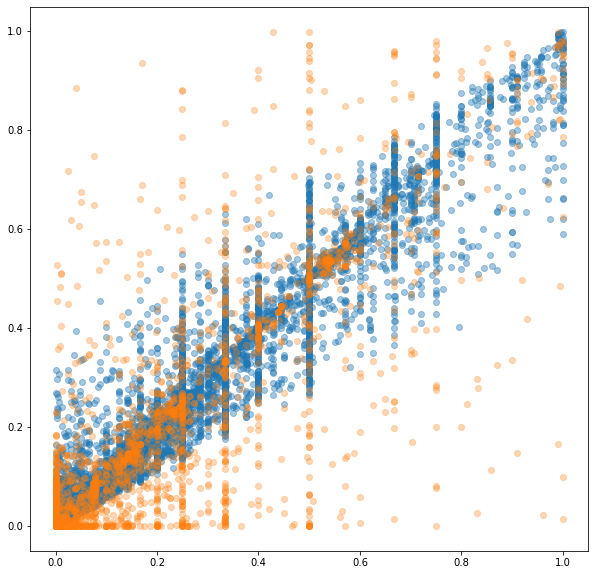

In [108]:
train_val = (len(data_maxTc)*80)//100
model_compos = RandomForestRegressor(max_depth=60,min_samples_leaf=1)

model_compos.fit(data_maxTc.loc[:train_val-1,elems_b],data_maxTc.loc[:train_val-1,elems_x])
print(model_compos.score(data_maxTc.loc[:train_val-1,elems_b],data_maxTc.loc[:train_val-1,elems_x]))
print(model_compos.score(data_maxTc.loc[train_val:,elems_b],data_maxTc.loc[train_val:,elems_x]))

predict_compos = model_compos.predict(data_maxTc.loc[:,elems_b])
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(np.array(data_maxTc.loc[:train_val-1,elems_x]).flatten(),np.array(predict_compos[:train_val]).flatten(),alpha=0.4)
ax.scatter(np.array(data_maxTc.loc[train_val:,elems_x]).flatten(),np.array(predict_compos[train_val:]).flatten(),alpha=0.3)
# fig.savefig(f"Comp-RFR-{md}.png")
# plt.close()
plt.show()

0.9779679237773871
0.8501595528654079


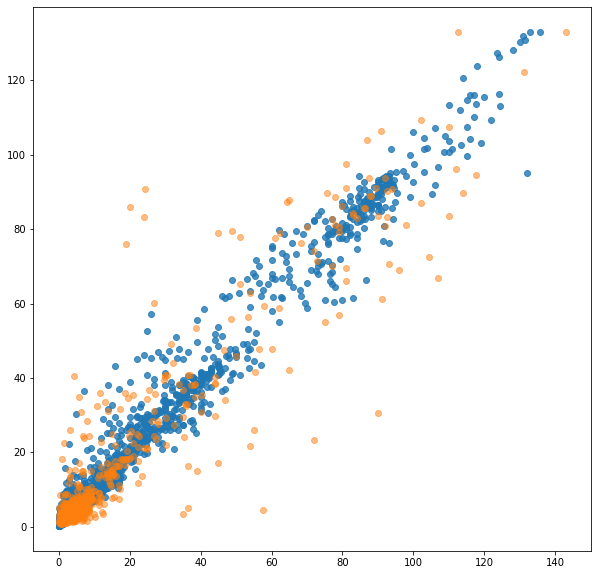

In [102]:
train_val = (len(data_maxTc)*80)//100
model_maxTc = RandomForestRegressor(max_depth=100,min_samples_leaf=1)

model_maxTc.fit(data_maxTc.loc[:train_val-1,elems_b],data_maxTc.loc[:train_val-1,"Critical Temperature"])
print(model_maxTc.score(data_maxTc.loc[:train_val-1,elems_b],data_maxTc.loc[:train_val-1,"Critical Temperature"]))
print(model_maxTc.score(data_maxTc.loc[train_val:,elems_b],data_maxTc.loc[train_val:,"Critical Temperature"]))

predict_maxTc = model_maxTc.predict(data_maxTc.loc[:,elems_b])

fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(data_maxTc.loc[:train_val-1,"Critical Temperature"],predict_maxTc[:train_val], alpha=0.8)
ax.scatter(data_maxTc.loc[train_val:,"Critical Temperature"],predict_maxTc[train_val:], alpha=0.5)
plt.show()

## Importing element properties

In [109]:
elem_df = pd.read_csv("elements_data.csv")

In [112]:
elem_df.drop(columns=["Origin of name[2][3]","Abundance in Earth's crust (mg/kg)"],inplace=True)

In [120]:
elem_df = elem_df[elem_df['Symbol'].notna()]

In [122]:
elem_df[~elem_df['Electro-negativity'].notna()]

Atomic number Symbol        Element  Group  Period  Atomic weight (u)  \
1              2.0     He         Helium   18.0     1.0           4.002602   
9             10.0     Ne           Neon   18.0     2.0          20.179700   
17            18.0     Ar          Argon   18.0     3.0          39.948000   
103          104.0     Rf  Rutherfordium    4.0     7.0         267.000000   
104          105.0     Db        Dubnium    5.0     7.0         268.000000   
105          106.0     Sg     Seaborgium    6.0     7.0         269.000000   
106          107.0     Bh        Bohrium    7.0     7.0         270.000000   
107          108.0     Hs        Hassium    8.0     7.0         270.000000   
108          109.0     Mt     Meitnerium    9.0     7.0         278.000000   
109          110.0     Ds   Darmstadtium   10.0     7.0         281.000000   
110          111.0     Rg    Roentgenium   11.0     7.0         282.000000   
111          112.0     Cn    Copernicium   12.0     7.0         285.000000   
112          113.0     Nh       Nihonium   13.0     7.0         286.000000   
113          114.0     Fl      Flerovium   14.0     7.0         289.000000   
114          115.0     Mc      Moscovium   15.0     7.0         290.000000   
115          116.0     Lv    Livermorium   16.0     7.0         293.000000   
116          117.0     Ts     Tennessine   17.0     7.0         294.000000   
117          118.0     Og      Oganesson   18.0     7.0         294.000000   

    Density (g/cm^3)  Melting point (K)  Boiling point (K)  \
1          0.0001785                NaN               4.22   
9          0.0008999              24.56              27.07   
17         0.0017837              83.80              87.30   
103     (23.2)[XIII]            2400.00            5800.00   
104     (29.3)[XIII]                NaN                NaN   
105     (35.0)[XIII]                NaN                NaN   
106     (37.1)[XIII]                NaN                NaN   
107     (40.7)[XIII]                NaN                NaN   
108     (37.4)[XIII]                NaN                NaN   
109     (34.8)[XIII]                NaN                NaN   
110     (28.7)[XIII]                NaN                NaN   
111     (14.0)[XIII]             283.00             340.00   
112       (16)[XIII]             700.00            1400.00   
113       (14)[XIII]                NaN             210.00   
114     (13.5)[XIII]             700.00            1400.00   
115     (12.9)[XIII]             700.00            1100.00   
116      (7.2)[XIII]             700.00             883.00   
117  (5.0)[XIII][XV]             320.00             350.00   

     Specific Heat Capacity (J/g/K)   Electro-negativity  
1                              5.193                 NaN  
9                              1.030                 NaN  
17                             0.520                 NaN  
103                              NaN                 NaN  
104                              NaN                 NaN  
105                              NaN                 NaN  
106                              NaN                 NaN  
107                              NaN                 NaN  
108                              NaN                 NaN  
109                              NaN                 NaN  
110                              NaN                 NaN  
111                              NaN                 NaN  
112                              NaN                 NaN  
113                              NaN                 NaN  
114                              NaN                 NaN  
115                              NaN                 NaN  
116                              NaN                 NaN  
117                              NaN                 NaN

In [225]:
from element_list import valid_elems as valid_elems_new

In [354]:
import math 
valid_elems_atom = {}
valid_elems_mass = {}
valid_elems_elec = {}
for symb,a_no,m_no,e_no in zip(elem_df["Symbol"],elem_df["Atomic number"],elem_df["Atomic weight (u)"],elem_df["Electro-negativity"]):
    valid_elems_atom[symb] = a_no
    valid_elems_mass[symb] = m_no
    if math.isnan(e_no):
        valid_elems_elec[symb] = 0
    else:
        valid_elems_elec[symb] = e_no

In [355]:
valid_elems_atom['D'] = valid_elems_atom['H']
valid_elems_atom['T'] = valid_elems_atom['H']

valid_elems_mass['D'] = 2.014
valid_elems_mass['T'] = 3.016

valid_elems_elec['D'] = valid_elems_elec['H']
valid_elems_elec['T'] = valid_elems_elec['H']


In [380]:
import importlib 
importlib.reload(element_list)
import element_list
valid_elem_period = element_list.elem_period
valid_elem_group = element_list.elem_group

In [383]:
{key:(valid_elem_period[key],valid_elem_group[key]) for key in valid_elem_period.keys()}

{'H': (1, 1),
 'D': (1, 1),
 'T': (1, 1),
 'He': (1, 32),
 'Li': (2, 1),
 'Be': (2, 2),
 'B': (2, 27),
 'C': (2, 28),
 'N': (2, 29),
 'O': (2, 30),
 'F': (2, 31),
 'Ne': (2, 32),
 'Na': (3, 1),
 'Mg': (3, 2),
 'Al': (3, 27),
 'Si': (3, 28),
 'P': (3, 29),
 'S': (3, 30),
 'Cl': (3, 31),
 'Ar': (3, 32),
 'K': (4, 1),
 'Ca': (4, 2),
 'Sc': (4, 17),
 'Ti': (4, 18),
 'V': (4, 19),
 'Cr': (4, 20),
 'Mn': (4, 21),
 'Fe': (4, 22),
 'Co': (4, 23),
 'Ni': (4, 24),
 'Cu': (4, 25),
 'Zn': (4, 26),
 'Ga': (4, 27),
 'Ge': (4, 28),
 'As': (4, 29),
 'Se': (4, 30),
 'Br': (4, 31),
 'Kr': (4, 32),
 'Rb': (5, 1),
 'Sr': (5, 2),
 'Y': (5, 17),
 'Zr': (5, 18),
 'Nb': (5, 19),
 'Mo': (5, 20),
 'Tc': (5, 21),
 'Ru': (5, 22),
 'Rh': (5, 23),
 'Pd': (5, 24),
 'Ag': (5, 25),
 'Cd': (5, 26),
 'In': (5, 27),
 'Sn': (5, 28),
 'Sb': (5, 29),
 'Te': (5, 30),
 'I': (5, 31),
 'Xe': (5, 32),
 'Cs': (6, 1),
 'Ba': (6, 2),
 'La': (6, 3),
 'Ce': (6, 4),
 'Pr': (6, 5),
 'Nd': (6, 6),
 'Pm': (6, 7),
 'Sm': (6, 8),
 'Eu': (6

# Data for app

In [514]:
data_maxTc.to_csv("for_the_app/data_maxTc.csv",index=None)

In [515]:
data_df.to_csv("for_the_app/data_df.csv",index=None)

In [518]:
elem_df.head()

Atomic number Symbol    Element  Group  Period  Atomic weight (u)  \
0            1.0      H   Hydrogen    1.0     1.0           1.008000   
1            2.0     He     Helium   18.0     1.0           4.002602   
2            3.0     Li    Lithium    1.0     2.0           6.940000   
3            4.0     Be  Beryllium    2.0     2.0           9.012183   
4            5.0      B      Boron   13.0     2.0          10.810000   

  Density (g/cm^3)  Melting point (K)  Boiling point (K)  \
0       0.00008988              14.01              20.28   
1        0.0001785                NaN               4.22   
2            0.534             453.69            1560.00   
3             1.85            1560.00            2742.00   
4             2.34            2349.00            4200.00   

   Specific Heat Capacity (J/g/K)   Electro-negativity  
0                           14.304                2.20  
1                            5.193                 NaN  
2                            3.582                0.98  
3                            1.825                1.57  
4                            1.026                2.04

In [519]:
elem_df.columns

Index(['Atomic number', 'Symbol', 'Element', 'Group', 'Period',
       'Atomic weight (u)', 'Density (g/cm^3)', 'Melting point (K)',
       'Boiling point (K)', 'Specific Heat Capacity (J/g/K) ',
       'Electro-negativity'],
      dtype='object')

In [534]:
elem_df_save = elem_df.loc[:,['Atomic number', 'Symbol', 'Element', 'Group', 'Period', 'Atomic weight (u)']]
for iso,isoelem in zip(['D','T'],['Deuterium','Tritium']):
    elem_df_save = elem_df_save.append({'Atomic number': valid_elems_atom[iso], 
                                        'Symbol': iso, 
                                        'Element': isoelem, 
                                        'Group': valid_elem_group[iso], 
                                        'Period':valid_elem_period[iso], 
                                        'Atomic weight (u)': valid_elems_mass[iso]
                                       }, ignore_index=True
                                      )
elem_df_save = elem_df_save.sort_values(["Atomic number","Atomic weight (u)"]).reset_index(drop=True)
elem_df_save

Atomic number Symbol      Element  Group  Period  Atomic weight (u)
0              1.0      H     Hydrogen    1.0     1.0           1.008000
1              1.0      D    Deuterium    1.0     1.0           2.014000
2              1.0      T      Tritium    1.0     1.0           3.016000
3              2.0     He       Helium   18.0     1.0           4.002602
4              3.0     Li      Lithium    1.0     2.0           6.940000
..             ...    ...          ...    ...     ...                ...
115          114.0     Fl    Flerovium   14.0     7.0         289.000000
116          115.0     Mc    Moscovium   15.0     7.0         290.000000
117          116.0     Lv  Livermorium   16.0     7.0         293.000000
118          117.0     Ts   Tennessine   17.0     7.0         294.000000
119          118.0     Og    Oganesson   18.0     7.0         294.000000

[120 rows x 6 columns]

In [540]:
elem_df_save["Symbol"].tolist()

['H',
 'D',
 'T',
 'He',
 'Li',
 'Be',
 'B',
 'C',
 'N',
 'O',
 'F',
 'Ne',
 'Na',
 'Mg',
 'Al',
 'Si',
 'P',
 'S',
 'Cl',
 'Ar',
 'K',
 'Ca',
 'Sc',
 'Ti',
 'V',
 'Cr',
 'Mn',
 'Fe',
 'Co',
 'Ni',
 'Cu',
 'Zn',
 'Ga',
 'Ge',
 'As',
 'Se',
 'Br',
 'Kr',
 'Rb',
 'Sr',
 'Y',
 'Zr',
 'Nb',
 'Mo',
 'Tc',
 'Ru',
 'Rh',
 'Pd',
 'Ag',
 'Cd',
 'In',
 'Sn',
 'Sb',
 'Te',
 'I',
 'Xe',
 'Cs',
 'Ba',
 'La',
 'Ce',
 'Pr',
 'Nd',
 'Pm',
 'Sm',
 'Eu',
 'Gd',
 'Tb',
 'Dy',
 'Ho',
 'Er',
 'Tm',
 'Yb',
 'Lu',
 'Hf',
 'Ta',
 'W',
 'Re',
 'Os',
 'Ir',
 'Pt',
 'Au',
 'Hg',
 'Tl',
 'Pb',
 'Bi',
 'Po',
 'At',
 'Rn',
 'Fr',
 'Ra',
 'Ac',
 'Th',
 'Pa',
 'U',
 'Np',
 'Pu',
 'Am',
 'Cm',
 'Bk',
 'Cf',
 'Es',
 'Fm',
 'Md',
 'No',
 'Lr',
 'Rf',
 'Db',
 'Sg',
 'Bh',
 'Hs',
 'Mt',
 'Ds',
 'Rg',
 'Cn',
 'Nh',
 'Fl',
 'Mc',
 'Lv',
 'Ts',
 'Og']

In [536]:
elem_df_save.dtypes

Atomic number        float64
Symbol                object
Element               object
Group                float64
Period               float64
Atomic weight (u)    float64
dtype: object

In [535]:
elem_df_save.to_csv("for_the_app/elem_df.csv",index=None)

# Transformer for <i>8</i>-elements present in a compound

In [445]:
from sklearn import base
from sklearn.preprocessing import StandardScaler
class constituent_transformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_names, sort_by, ext="", passthru=[], stdScale=[]):
        self.col_names = col_names  # We will need these in transform()
        self.sort_by = sort_by  # We will need these in transform()
        self.ext = ext  # We will need these in transform()
        self.passthru = passthru  # We will need these in transform()
        self.stdScale = stdScale  # We will need these in transform()
    
    def fit(self, X, y=None):
        self.col_sorted = sorted(self.col_names,key=lambda x: [-sb[x] for sb in self.sort_by])
        self.col_ext = [col+self.ext for col in self.col_sorted]
        if self.stdScale:
            self.ssc = StandardScaler()
            self.ssc.fit(X[self.stdScale])
        return self
    
    def row_transform(self,X):
        Y = []
        for Xrow in X.to_numpy():
            Yrow = [0 for _ in range(8*len(self.sort_by))]
            i=0
            for xi,Xitem in enumerate(Xrow):
                if Xitem>0:
                    for j in range(len(self.sort_by)):
                        Yrow[len(self.sort_by)*i+j] = self.sort_by[j][self.col_sorted[xi]]*Xitem
                    i += 1
            Y.append(Yrow)
        return pd.DataFrame(Y)
    
    def transform(self, X):
        # Return an array with the same number of rows as X and one
        # column for each in self.col_names
        Y = self.row_transform(X[self.col_ext])
        if self.passthru:
            Y[self.passthru] = X[self.passthru]
        if self.stdScale:
            Y[self.stdScale] = self.ssc.transform(X[self.stdScale])
        return Y


In [470]:
from sklearn import base
from sklearn.preprocessing import StandardScaler
class element_sorter(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_names, sort_by, ext="", passthru=[], stdScale=[]):
        self.col_names = col_names  # We will need these in transform()
        self.sort_by = sort_by  # We will need these in transform()
        self.ext = ext  # We will need these in transform()
        self.passthru = passthru  # We will need these in transform()
        self.stdScale = stdScale  # We will need these in transform()
    
    def fit(self, X, y=None):
        self.col_sorted = sorted(self.col_names,key=lambda x: [-sb[x] for sb in self.sort_by])
        self.col_ext = [col+self.ext for col in self.col_sorted]
        if self.stdScale:
            self.ssc = StandardScaler()
            self.ssc.fit(X[self.stdScale])
        return self
    
    def row_transform(self,X):
        Y = []
        els = []
        for Xrow in X.to_numpy():
            Yrow = [0 for _ in range(8)]
            elsrow = ["Empty" for _ in range(8)]
            i=0
            for xi,Xitem in enumerate(Xrow):
                if Xitem>0:
                    Yrow[i] = Xitem
                    elsrow[i] = self.col_sorted[xi]
                    i += 1
            Y.append(Yrow)
            els.append(elsrow)
        return pd.DataFrame(Y)
    
    def transform(self, X):
        # Return an array with the same number of rows as X and one
        # column for each in self.col_names
        Y = self.row_transform(X[self.col_ext])
        if self.passthru:
            Y[self.passthru] = X[self.passthru]
        if self.stdScale:
            Y[self.stdScale] = self.ssc.transform(X[self.stdScale])
        return Y


In [363]:
ct = constituent_transformer(col_names=valid_elems,
                             sort_by=[valid_elems_atom,valid_elems_mass,valid_elems_elec],
                             ext="_x")

In [364]:
ct.fit(data_maxTc)

constituent_transformer(col_names=['H', 'D', 'T', 'He', 'Li', 'Be', 'B', 'C',
                                   'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si',
                                   'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti',
                                   'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', ...],
                        ext='_x',
                        sort_by=[{'Ac': 89.0, 'Ag': 47.0, 'Al': 13.0,
                                  'Am': 95.0, 'Ar': 18.0, 'As': 33.0,
                                  'At': 85.0, 'Au': 79.0, 'B': 5.0, 'Ba': 56.0,
                                  'Be': 4.0, 'Bh': 107.0, 'Bi': 83.0,
                                  'Bk': 97.0, 'Br': 35.0, 'C': 6...
                                  'Cr': 51.9961, 'Cs': 132.905452, 'Cu': 63.546,
                                  'D': 2.014, 'Db': 268.0, 'Ds': 281.0, ...},
                                 {'Ac': 1.1, 'Ag': 1.93, 'Al': 1.61, 'Am': 1.13,
                                  'Ar': 0, 'As': 2.18,

In [365]:
ct.transform(data_maxTc.loc[:10])

0           1         2          3          4         5   \
0   78.857143  204.024780  1.182857   3.714286   7.977857  0.261429   
1    3.387755    8.529812  0.082449  14.326531  32.659288  0.448163   
2   46.800000  117.050400  1.368000   4.000000   8.015600  0.200000   
3   62.068966  154.102345  1.572414   3.620690   7.751019  0.234483   
4    7.750000   17.430750  0.452500   1.478250   3.226592  0.102930   
5    7.933333   19.454658  0.126083  17.000000  40.586667  0.683333   
6    3.700000    9.192000  0.118000  18.900000  43.177500  0.972000   
7   13.600000   33.451800  0.248000   7.800000  16.753500  0.549000   
8    8.128342   18.742246  0.203209   3.101604   6.796364  0.203209   
9   15.882353   38.181706  0.301765   4.264706   9.345000  0.279412   
10   4.800000   11.770886  0.076286   7.600000  17.524000  0.190000   

           6          7         8         9   ...        14  15  16  17  18  \
0    0.000000   0.000000  0.000000  0.000000  ...  0.000000   0   0   0   0   
1    3.551020   7.108551  1.509184  0.000000  ...  0.000000   0   0   0   0   
2    3.000000   6.194752  0.438000  0.000000  ...  0.000000   0   0   0   0   
3    0.000000   0.000000  0.000000  0.000000  ...  0.000000   0   0   0   0   
4   15.990750  35.417078  1.133258  0.000000  ...  0.000000   0   0   0   0   
5    7.333333  15.955667  0.513333  0.275000  ...  0.573333   0   0   0   0   
6    1.500000   3.002750  0.637500  1.250000  ...  0.000000   0   0   0   0   
7    7.000000  14.042500  0.950000  0.000000  ...  0.000000   0   0   0   0   
8    4.577540   9.154508  1.968342  0.224599  ...  0.190909   0   0   0   0   
9    4.705882   9.411176  2.023529  0.000000  ...  0.000000   0   0   0   0   
10   4.142857   9.078000  0.271429  2.571429  ...  0.982857   0   0   0   0   

    19  20  21  22  23  
0    0   0   0   0   0  
1    0   0   0   0   0  
2    0   0   0   0   0  
3    0   0   0   0   0  
4    0   0   0   0   0  
5    0   0   0   0   0  
6    0   0   0   0   0  
7    0   0   0   0   0  
8    0   0   0   0   0  
9    0   0   0   0   0  
10   0   0   0   0   0  

[11 rows x 24 columns]

# Model: Composition given Elements present

In [ ]:
pipeCompos = Pipeline([
    ('ct', constituent_transformer(col_names=valid_elems,
                                   sort_by=[valid_elem_period,valid_elem_group,valid_elems_mass],
                                   ext="_b")),
    ('rfr', RandomForestRegressor(max_depth=50,min_samples_leaf=1))
])
pipeoutCompos = Pipeline([
    ('ct', element_sorter(col_names=valid_elems,
                                   sort_by=[valid_elem_period,valid_elem_group,valid_elems_mass],
                                   ext="_x"))
])
pipeoutCompos.fit(data_maxTc.loc[:,elems_x])

In [509]:
gscCompos = GridSearchCV(pipeCompos,param_grid={'rfr__max_depth':[20,40,60,80,100],'rfr__min_samples_leaf':[1,2]}, verbose=1)
gscCompos.fit(data_maxTc.loc[:,elems_b+["Critical Temperature"]],pipeoutCompos.transform(data_maxTc.loc[:,elems_x]))
gscCompos.best_params_,gsc.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


({'rfr__max_depth': 100, 'rfr__min_samples_leaf': 1}, 0.9363626705188149)

0.975737737738059
0.9786570484018327


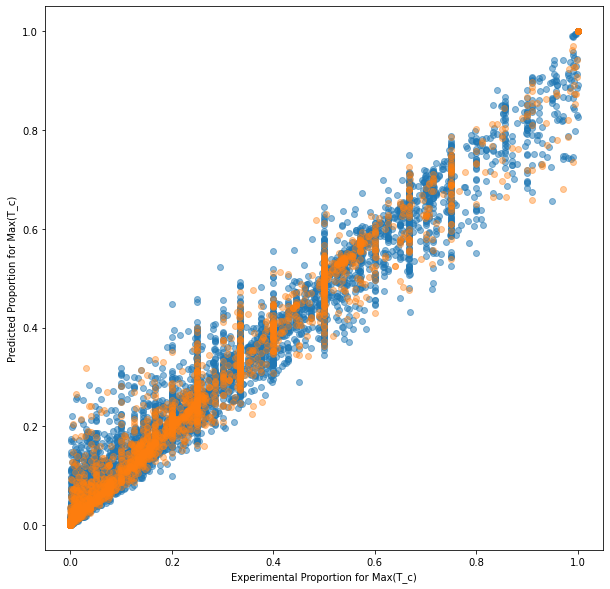

In [511]:
train_val = (len(data_maxTc)*80)//100

# pipeCompos.fit(data_maxTc.loc[:train_val-1,elems_b],pipeoutCompos.transform(data_maxTc.loc[:train_val-1,elems_x]))
print(gscCompos.best_estimator_.score(data_maxTc.loc[:train_val-1,elems_b],pipeoutCompos.transform(data_maxTc.loc[:train_val-1,elems_x])))
print(gscCompos.best_estimator_.score(data_maxTc.loc[train_val:,elems_b],pipeoutCompos.transform(data_maxTc.loc[train_val:,elems_x])))

predict_Compos = gscCompos.best_estimator_.predict(data_maxTc.loc[:,elems_b])
# predict_Compos = predict_compos/np.sum(predict_Compos,axis=1,keepdims=True)
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(np.array(pipeoutCompos.transform(data_maxTc.loc[:train_val-1,elems_x])).flatten(),np.array(predict_Compos[:train_val]).flatten(),alpha=0.5)
ax.scatter(np.array(pipeoutCompos.transform(data_maxTc.loc[train_val:,elems_x])).flatten(),np.array(predict_Compos[train_val:]).flatten(),alpha=0.4)
ax.set_xlabel("Experimental Proportion for Max(T_c)")
ax.set_ylabel("Predicted Proportion for Max(T_c)")
plt.show()

In [512]:
import joblib
joblib.dump(gscCompos.best_estimator_, 'for_the_app/composTcMax_model_8elem.pkl', compress = 1)

['for_the_app/composTcMax_model_8elem.pkl']

# Model: Critical Temperature from Composition

In [494]:
pipeTc = Pipeline([
    ('ct', constituent_transformer(col_names=valid_elems,
                                   sort_by=[valid_elem_period,valid_elem_group,valid_elems_mass],
                                   ext="_x")),
    ('rfr', RandomForestRegressor(max_depth=80,min_samples_leaf=1))
])

In [489]:
gscTc = GridSearchCV(pipeTc,param_grid={'rfr__max_depth':[20,40,60,80,100],'rfr__min_samples_leaf':[1,2]}, verbose=1)
gscTc.fit(data_df.loc[:,elems_x],data_df.loc[:,"Critical Temperature"])
gscTc.best_params_,gscTc.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.3min finished


({'rfr__max_depth': 80, 'rfr__min_samples_leaf': 1}, 0.8946132802036377)

In [496]:
gscTc = GridSearchCV(pipeTc,param_grid={'rfr__max_depth':[70,80,90],'rfr__min_samples_leaf':[1]}, verbose=1)
gscTc.fit(data_df.loc[:,elems_x],data_df.loc[:,"Critical Temperature"])
gscTc.best_params_,gscTc.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.3min finished


({'rfr__max_depth': 70, 'rfr__min_samples_leaf': 1}, 0.8942798182104109)

0.9866493561448916
0.9853948480745951


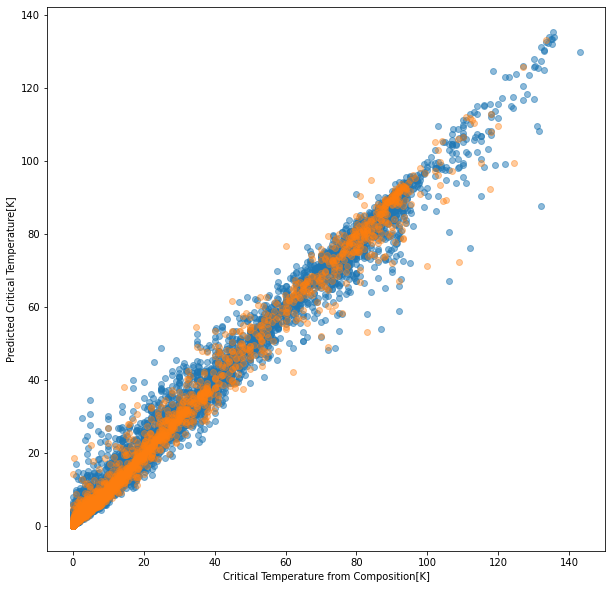

In [513]:
train_val = (len(data_df)*80)//100

# pipeTc.fit(data_df.loc[:train_val-1,elems_x],data_df.loc[:train_val-1,"Critical Temperature"])
print(gscTc.best_estimator_.score(data_df.loc[:train_val-1,elems_x],data_df.loc[:train_val-1,"Critical Temperature"]))
print(gscTc.best_estimator_.score(data_df.loc[train_val:,elems_x],data_df.loc[train_val:,"Critical Temperature"]))

predict_Tc = gscTc.best_estimator_.predict(data_df.loc[:,elems_x])
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(np.array(data_df.loc[:train_val-1,"Critical Temperature"]).flatten(),np.array(predict_Tc[:train_val]).flatten(),alpha=0.5)
ax.scatter(np.array(data_df.loc[train_val:,"Critical Temperature"]).flatten(),np.array(predict_Tc[train_val:]).flatten(),alpha=0.4)
ax.set_xlabel("Critical Temperature from Composition[K]")
ax.set_ylabel("Predicted Critical Temperature[K]")
plt.show()

In [503]:
import joblib
joblib.dump(gscTc.best_estimator_, 'for_the_app/Tc_model_8elem.pkl', compress = 1)

['for_the_app/Tc_model_8elem.pkl']

# Model: Composition given Critical Temperature

In [ ]:
pipeComposT = Pipeline([
    ('ct', constituent_transformer(col_names=valid_elems,
                                   sort_by=[valid_elems_mass,valid_elem_period,valid_elem_group],
                                   ext="_b",
                                   stdScale=["Critical Temperature"])),
    ('rfr', RandomForestRegressor(max_depth=100,min_samples_leaf=1))
])
pipeoutComposT = Pipeline([
    ('es', element_sorter(col_names=valid_elems,
                                   sort_by=[valid_elems_mass,valid_elem_period,valid_elem_group],
                                   ext="_x"))
])
pipeoutComposT.fit(data_df.loc[:,elems_x])


In [455]:
gscComposT = GridSearchCV(pipeComposT,param_grid={'rfr__max_depth':[20,40,80,160],'rfr__min_samples_leaf':[1,2]}, verbose=1)
gscComposT.fit(data_df.loc[:,elems_b+["Critical Temperature"]],pipeoutComposT.transform(data_df.loc[:,elems_x]))
gscComposT.best_params_,gsc.best_score_

({'rfr__max_depth': 80, 'rfr__min_samples_leaf': 1}, 0.9368485030806941)

In [457]:
gscComposT = GridSearchCV(pipeComposT,param_grid={'rfr__max_depth':[60,80,100,120],'rfr__min_samples_leaf':[1,2]}, verbose=1)
gscComposT.fit(data_df.loc[:,elems_b+["Critical Temperature"]],pipeoutComposT.transform(data_df.loc[:,elems_x]))
gscComposT.best_params_,gsc.best_score_

({'rfr__max_depth': 100, 'rfr__min_samples_leaf': 1}, 0.9364642015878879)

In [505]:
gscComposT = GridSearchCV(pipeComposT,param_grid={'rfr__max_depth':[90,100,110],'rfr__min_samples_leaf':[1]}, verbose=1)
gscComposT.fit(data_df.loc[:,elems_b+["Critical Temperature"]],pipeoutComposT.transform(data_df.loc[:,elems_x]))
gscComposT.best_params_,gsc.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.1min finished


({'rfr__max_depth': 90, 'rfr__min_samples_leaf': 1}, 0.9363626705188149)

0.9899123751815873
0.9911479816669264


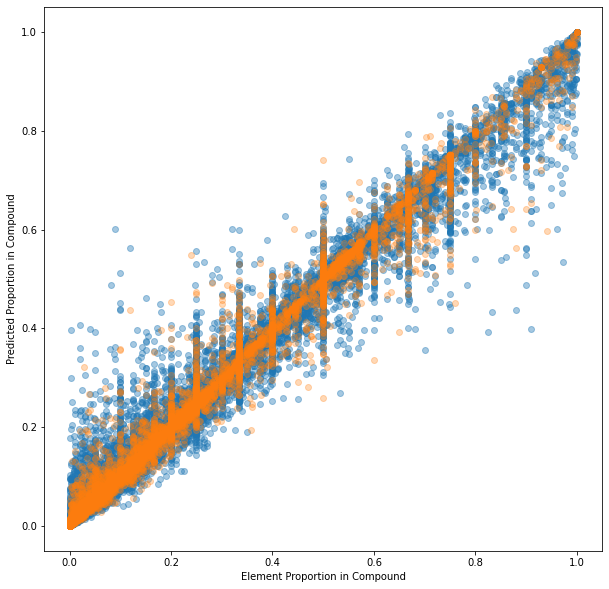

In [506]:
train_val = (len(data_df)*80)//100

# pipeComposT.fit(data_df.loc[:train_val-1,elems_b+["Critical Temperature"]],pipeoutComposT.transform(data_df.loc[:train_val-1,elems_x]))
print(gscComposT.best_estimator_.score(data_df.loc[:train_val-1,elems_b+["Critical Temperature"]],pipeoutComposT.transform(data_df.loc[:train_val-1,elems_x])))
print(gscComposT.best_estimator_.score(data_df.loc[train_val:,elems_b+["Critical Temperature"]],pipeoutComposT.transform(data_df.loc[train_val:,elems_x])))

predict_ComposT = gscComposT.best_estimator_.predict(data_df.loc[:,elems_b+["Critical Temperature"]])
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(np.array(pipeoutComposT.transform(data_df.loc[:train_val-1,elems_x])).flatten(),np.array(predict_ComposT[:train_val]).flatten(),alpha=0.4)
ax.scatter(np.array(pipeoutComposT.transform(data_df.loc[train_val:,elems_x])).flatten(),np.array(predict_ComposT[train_val:]).flatten(),alpha=0.3)
ax.set_xlabel("Element Proportion in Compound")
ax.set_ylabel("Predicted Proportion in Compound")
plt.show()

In [507]:
import joblib
joblib.dump(gscComposT.best_estimator_, 'for_the_app/composTc_model_8elem.pkl', compress = 1)

['for_the_app/composTc_model_8elem.pkl']

---
# Cleaning COD formula

In [167]:
cod_df = pd.read_csv("cod_all.csv",
#                      nrows=1,
                     sep='\t',
                     usecols=["formula"])

In [171]:
cod_df["Composition"] = cod_df["formula"].str.findall(r'([A-Z][a-z]*)(\d*[.]*\d*)\s')

In [172]:
cod_df

formula  \
0               - C5 H17 Al N2 O8 P2 -   
1                - C107 H142 N14 O26 -   
2                      - C3 D3 O7 Sr -   
3                         - C3 O6 Sr -   
4       - C44 H58 Cu4 F12 N20 O25 S4 -   
...                                ...   
468834                  - C8 H4 O5 V -   
468835                 - C8 H4 In O5 -   
468836     - C8 H3 D5.04 Fe N2.23 O5 -   
468837   - C8 H3.3 D0.88 In N0.33 O5 -   
468838      - C8 H3 D6.65 N2.22 O5 V -   

                                              Composition  
0       [(C, 5), (H, 17), (Al, ), (N, 2), (O, 8), (P, 2)]  
1                  [(C, 107), (H, 142), (N, 14), (O, 26)]  
2                        [(C, 3), (D, 3), (O, 7), (Sr, )]  
3                                [(C, 3), (O, 6), (Sr, )]  
4       [(C, 44), (H, 58), (Cu, 4), (F, 12), (N, 20), ...  
...                                                   ...  
468834                    [(C, 8), (H, 4), (O, 5), (V, )]  
468835                   [(C, 8), (H, 4), (In, ), (O, 5)]  
468836  [(C, 8), (H, 3), (D, 5.04), (Fe, ), (N, 2.23),...  
468837  [(C, 8), (H, 3.3), (D, 0.88), (In, ), (N, 0.33...  
468838  [(C, 8), (H, 3), (D, 6.65), (N, 2.22), (O, 5),...  

[468839 rows x 2 columns]

In [173]:
cod_elems = []
from collections import defaultdict 
cod_elem_dict = defaultdict(int)
[[cod_elems.extend([el[0]]) for el in comp] for comp in list(cod_df["Composition"])]

for comp in list(cod_df["Composition"]):
    for el,_ in comp:
        cod_elem_dict[el]+=1

cod_elems = list(set(cod_elems))

len(cod_elem_dict)

109

In [174]:
invalid_cod_elems = []
for el in cod_elems:
    if el not in valid_elems:
        print(el)
        invalid_cod_elems.append(el)

M
On
X
Ct
E
L
Z
R
A
Ph
Cb


In [175]:
invalidIndex = []
def invalidEl(compos):
    for el,_ in compos:
        if el in invalid_cod_elems:
            return False
    return True
indexInvalid = cod_df["Composition"].apply(invalidEl)

In [176]:
sum(~indexInvalid)

20

In [177]:
cod_df2 = cod_df[indexInvalid].reset_index(drop=True)

In [178]:
cod_df[~indexInvalid]

formula  \
28539                                - C21 H18 M N10 O2 -   
40330                                         - Cl X O4 -   
56192   - Al2.34 Ca0.02 Fe0.02 H4 K0.78 Mg0.34 Na0.02 ...   
56193   - Al2.34 Ca0.02 Fe0.02 H4 K0.78 Mg0.34 Na0.02 ...   
56194   - Al2.34 Ca0.02 Fe0.02 H4 K0.78 Mg0.34 Na0.02 ...   
56195   - Al2.34 Ca0.02 Fe0.02 H4 K0.78 Mg0.34 Na0.02 ...   
71537                                         - Cb K O3 -   
144265                           - H668 M Na6 O814 P R6 -   
147680                        - C30 H38 B F4 M N3 O7 P2 -   
147681                           - C47 H54 B M N3 O7 P2 -   
241827                              - Ct H20 N2 O2 wo23 -   
265901                           - C48 H41 Cl5 M N27 O4 -   
286707                     - C224 H240 B Br4 O32 R4 Rh4 -   
291381                              - C42 H41 I L O2 Zr -   
369108          - E1.19 Nb0.39 O4 R Ta0.58 Ti0.02 Y0.81 -   
409279                        - C380 H280 N23 O16 Pd8 Z -   
413850  - C54 H0 Br3 N6 O36 Th Z at2 ca2 de di e3 ed2 ...   
431525                            - C26.5 H22 F4 L N2 O -   
444575                              - C28 H36 A2 Cu N O -   
465678                             - Ph as e kn n ow un -   

                                              Composition  
28539          [(C, 21), (H, 18), (M, ), (N, 10), (O, 2)]  
40330                             [(Cl, ), (X, ), (O, 4)]  
56192   [(Al, 2.34), (Ca, 0.02), (Fe, 0.02), (H, 4), (...  
56193   [(Al, 2.34), (Ca, 0.02), (Fe, 0.02), (H, 4), (...  
56194   [(Al, 2.34), (Ca, 0.02), (Fe, 0.02), (H, 4), (...  
56195   [(Al, 2.34), (Ca, 0.02), (Fe, 0.02), (H, 4), (...  
71537                             [(Cb, ), (K, ), (O, 3)]  
144265  [(H, 668), (M, ), (Na, 6), (O, 814), (P, ), (R...  
147680  [(C, 30), (H, 38), (B, ), (F, 4), (M, ), (N, 3...  
147681  [(C, 47), (H, 54), (B, ), (M, ), (N, 3), (O, 7...  
241827                  [(Ct, ), (H, 20), (N, 2), (O, 2)]  
265901  [(C, 48), (H, 41), (Cl, 5), (M, ), (N, 27), (O...  
286707  [(C, 224), (H, 240), (B, ), (Br, 4), (O, 32), ...  
291381   [(C, 42), (H, 41), (I, ), (L, ), (O, 2), (Zr, )]  
369108  [(E, 1.19), (Nb, 0.39), (O, 4), (R, ), (Ta, 0....  
409279  [(C, 380), (H, 280), (N, 23), (O, 16), (Pd, 8)...  
413850  [(C, 54), (H, 0), (Br, 3), (N, 6), (O, 36), (T...  
431525  [(C, 26.5), (H, 22), (F, 4), (L, ), (N, 2), (O...  
444575   [(C, 28), (H, 36), (A, 2), (Cu, ), (N, ), (O, )]  
465678                                           [(Ph, )]

In [186]:
cod_df2["comsplit"] = cod_df2["formula"].str.strip("-").str.strip().str.split(" ")

In [190]:
cod_df2["splen"] = cod_df2["comsplit"].apply(len)
cod_df2["colen"] = cod_df2["Composition"].apply(len)

In [191]:
cod_df2[~(cod_df2["colen"]==cod_df2["splen"])]

formula  \
5376                                                    ?   
5382                                                    ?   
5383                                                    ?   
5385                                                    ?   
5389                                                    ?   
...                                                   ...   
402721                - C69 H52 Cl3 N7 O7 Ti en lv so t -   
413833  - C8 H13 Be Br N O3 ad ar at2 be2 ca co d2 de ...   
431781                                 - C11 H5 N2 O5 a -   
447554                - C114 H70 N12 O24 Th3 en lv so t -   
447555                - C116 H72 N10 O24 Th3 en lv so t -   

                                              Composition  \
5376                                                   []   
5382                                                   []   
5383                                                   []   
5385                                                   []   
5389                                                   []   
...                                                   ...   
402721  [(C, 69), (H, 52), (Cl, 3), (N, 7), (O, 7), (T...   
413833   [(C, 8), (H, 13), (Be, ), (Br, ), (N, ), (O, 3)]   
431781                  [(C, 11), (H, 5), (N, 2), (O, 5)]   
447554     [(C, 114), (H, 70), (N, 12), (O, 24), (Th, 3)]   
447555     [(C, 116), (H, 72), (N, 10), (O, 24), (Th, 3)]   

                                                 comsplit  splen  colen  
5376                                                  [?]      1      0  
5382                                                  [?]      1      0  
5383                                                  [?]      1      0  
5385                                                  [?]      1      0  
5389                                                  [?]      1      0  
...                                                   ...    ...    ...  
402721         [C69, H52, Cl3, N7, O7, Ti, en, lv, so, t]     10      6  
413833  [C8, H13, Be, Br, N, O3, ad, ar, at2, be2, ca,...     47      6  
431781                               [C11, H5, N2, O5, a]      5      4  
447554          [C114, H70, N12, O24, Th3, en, lv, so, t]      9      5  
447555          [C116, H72, N10, O24, Th3, en, lv, so, t]      9      5  

[594 rows x 5 columns]

In [192]:
cod_df3 = cod_df2[(cod_df2["colen"]==cod_df2["splen"])].reset_index(drop=True)

In [193]:
cod_df3

formula  \
0               - C5 H17 Al N2 O8 P2 -   
1                - C107 H142 N14 O26 -   
2                      - C3 D3 O7 Sr -   
3                         - C3 O6 Sr -   
4       - C44 H58 Cu4 F12 N20 O25 S4 -   
...                                ...   
468220                  - C8 H4 O5 V -   
468221                 - C8 H4 In O5 -   
468222     - C8 H3 D5.04 Fe N2.23 O5 -   
468223   - C8 H3.3 D0.88 In N0.33 O5 -   
468224      - C8 H3 D6.65 N2.22 O5 V -   

                                              Composition  \
0       [(C, 5), (H, 17), (Al, ), (N, 2), (O, 8), (P, 2)]   
1                  [(C, 107), (H, 142), (N, 14), (O, 26)]   
2                        [(C, 3), (D, 3), (O, 7), (Sr, )]   
3                                [(C, 3), (O, 6), (Sr, )]   
4       [(C, 44), (H, 58), (Cu, 4), (F, 12), (N, 20), ...   
...                                                   ...   
468220                    [(C, 8), (H, 4), (O, 5), (V, )]   
468221                   [(C, 8), (H, 4), (In, ), (O, 5)]   
468222  [(C, 8), (H, 3), (D, 5.04), (Fe, ), (N, 2.23),...   
468223  [(C, 8), (H, 3.3), (D, 0.88), (In, ), (N, 0.33...   
468224  [(C, 8), (H, 3), (D, 6.65), (N, 2.22), (O, 5),...   

                                  comsplit  splen  colen  
0                [C5, H17, Al, N2, O8, P2]      6      6  
1                   [C107, H142, N14, O26]      4      4  
2                         [C3, D3, O7, Sr]      4      4  
3                             [C3, O6, Sr]      3      3  
4       [C44, H58, Cu4, F12, N20, O25, S4]      7      7  
...                                    ...    ...    ...  
468220                     [C8, H4, O5, V]      4      4  
468221                    [C8, H4, In, O5]      4      4  
468222      [C8, H3, D5.04, Fe, N2.23, O5]      6      6  
468223    [C8, H3.3, D0.88, In, N0.33, O5]      6      6  
468224       [C8, H3, D6.65, N2.22, O5, V]      6      6  

[468225 rows x 5 columns]

In [195]:
def joinTup(compos):
    return [''.join(el) for el in compos]
cod_df3["comjoin"] = cod_df3["Composition"].apply(joinTup)

In [199]:
cod_df3[~(cod_df3["comjoin"]==cod_df3["comsplit"])]

Empty DataFrame
Columns: [formula, Composition, comsplit, splen, colen, comjoin]
Index: []

In [200]:
cod_df3[valid_elems] = 0.0

In [201]:
cod_df3

formula  \
0               - C5 H17 Al N2 O8 P2 -   
1                - C107 H142 N14 O26 -   
2                      - C3 D3 O7 Sr -   
3                         - C3 O6 Sr -   
4       - C44 H58 Cu4 F12 N20 O25 S4 -   
...                                ...   
468220                  - C8 H4 O5 V -   
468221                 - C8 H4 In O5 -   
468222     - C8 H3 D5.04 Fe N2.23 O5 -   
468223   - C8 H3.3 D0.88 In N0.33 O5 -   
468224      - C8 H3 D6.65 N2.22 O5 V -   

                                              Composition  \
0       [(C, 5), (H, 17), (Al, ), (N, 2), (O, 8), (P, 2)]   
1                  [(C, 107), (H, 142), (N, 14), (O, 26)]   
2                        [(C, 3), (D, 3), (O, 7), (Sr, )]   
3                                [(C, 3), (O, 6), (Sr, )]   
4       [(C, 44), (H, 58), (Cu, 4), (F, 12), (N, 20), ...   
...                                                   ...   
468220                    [(C, 8), (H, 4), (O, 5), (V, )]   
468221                   [(C, 8), (H, 4), (In, ), (O, 5)]   
468222  [(C, 8), (H, 3), (D, 5.04), (Fe, ), (N, 2.23),...   
468223  [(C, 8), (H, 3.3), (D, 0.88), (In, ), (N, 0.33...   
468224  [(C, 8), (H, 3), (D, 6.65), (N, 2.22), (O, 5),...   

                                  comsplit  splen  colen  \
0                [C5, H17, Al, N2, O8, P2]      6      6   
1                   [C107, H142, N14, O26]      4      4   
2                         [C3, D3, O7, Sr]      4      4   
3                             [C3, O6, Sr]      3      3   
4       [C44, H58, Cu4, F12, N20, O25, S4]      7      7   
...                                    ...    ...    ...   
468220                     [C8, H4, O5, V]      4      4   
468221                    [C8, H4, In, O5]      4      4   
468222      [C8, H3, D5.04, Fe, N2.23, O5]      6      6   
468223    [C8, H3.3, D0.88, In, N0.33, O5]      6      6   
468224       [C8, H3, D6.65, N2.22, O5, V]      6      6   

                                   comjoin    H    D    T   He  ...   Pu   Am  \
0                [C5, H17, Al, N2, O8, P2]  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1                   [C107, H142, N14, O26]  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2                         [C3, D3, O7, Sr]  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3                             [C3, O6, Sr]  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4       [C44, H58, Cu4, F12, N20, O25, S4]  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...                                    ...  ...  ...  ...  ...  ...  ...  ...   
468220                     [C8, H4, O5, V]  0.0  0.0  0.0  0.0  ...  0.0  0.0   
468221                    [C8, H4, In, O5]  0.0  0.0  0.0  0.0  ...  0.0  0.0   
468222      [C8, H3, D5.04, Fe, N2.23, O5]  0.0  0.0  0.0  0.0  ...  0.0  0.0   
468223    [C8, H3.3, D0.88, In, N0.33, O5]  0.0  0.0  0.0  0.0  ...  0.0  0.0   
468224       [C8, H3, D6.65, N2.22, O5, V]  0.0  0.0  0.0  0.0  ...  0.0  0.0   

         Cm   Bk   Cf   Es   Fm   Md   No   Lr  
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  ...  
468220  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
468221  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
468222  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
468223  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
468224  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[468225 rows x 126 columns]

In [219]:
for row,symbol_weights in zip(cod_df3.index,cod_df3.Composition):
    for symbol,weight in symbol_weights:
        try:
            cod_df3.at[row,symbol] = (float(weight) if weight else 1.0)
            # if weight=='':
            #     print(symbol,data.at[row,"formula"],weight)
        except:
            print(row,symbol,weight)
            print(data2.at[row,"formula"])

In [220]:
cod_df3.to_csv("cod_cleaned.csv",index=None)